# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Salary` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
### Importing the drivers

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Read the file

sal_exp = pd.read_csv('Salary_Data.csv')
sal_exp.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


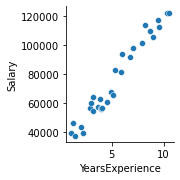

In [3]:
sns.pairplot(data= sal_exp, x_vars= 'YearsExperience', y_vars= 'Salary' )

<AxesSubplot:>

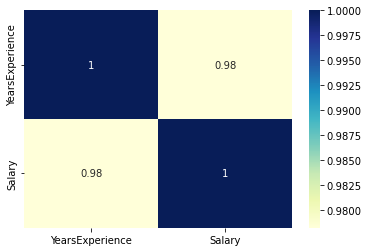

In [4]:
sns.heatmap(sal_exp.corr(), cmap = 'YlGnBu', annot= True)

In [5]:
X = sal_exp['YearsExperience']
y = sal_exp['Salary']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state= 100)

In [7]:
print (X_train.shape)
print (y_train.shape)
print (y_test.shape)
print (y_test.shape)

(21,)
(21,)
(9,)
(9,)


In [8]:
#add constant
X_train_sm = sm.add_constant(data = X_train)

#linear regression

lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Venket\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
lr.params

const              25202.887786
YearsExperience     9731.203838
dtype: float64

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           9.91e-14
Time:                        22:08:58   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387      8.765      0.000    1.92e+04    3.12e+04
YearsExperience  9731.2038    517.993     18.786      0.000    8647.033    1.08e+04
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Experience is 25202.88, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.949
Meaning that 94.9% of the variance in `Salary` is explained by `Experience`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

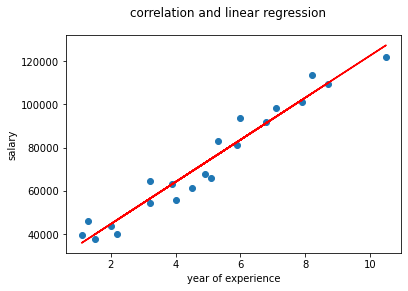

In [11]:
plt.scatter(X_train,y_train)
plt.plot(X_train, (X_train * 9731.20) + 25202.88, 'r')
plt.xlabel('year of experience')
plt.ylabel('salary')
plt.suptitle('correlation and linear regression')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [12]:
X_train_sm.head()

,const,YearsExperience
17,1.0,5.3
22,1.0,7.9
11,1.0,4.0
4,1.0,2.2
29,1.0,10.5


In [13]:
y_predict = lr.predict(X_train_sm)
res = (y_train - y_predict)

C:\Users\Venket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


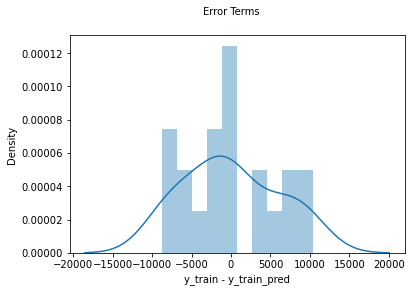

In [14]:
fig = plt.figure()
sns.distplot(res, bins = 10)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 10)         # X-label
plt.show()

#### Looking for patterns in the residuals

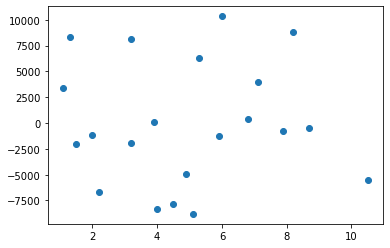

In [15]:
plt.scatter(X_train,res)

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [16]:
X_test_sm = sm.add_constant(X_test)

y_pred_test = lr.predict(X_test_sm)

C:\Users\Venket\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
y_pred_test

9      61208.341988
26    117649.324249
28    125434.287320
13     65100.823523
5      53423.378917
12     64127.703139
27    118622.444633
25    112783.722330
6      54396.499301
dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [19]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred_test))

5505.47900217613

###### Checking the R-squared on the test set

In [20]:
r_squared = r2_score(y_test, y_pred_test)
r_squared

0.962766868547327

##### Visualizing the fit on the test set

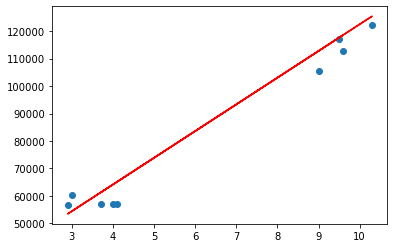

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test,(X_test * 9731.20) + 25202.88, 'r')
plt.show()